# Exploring Benthic Structure in California's Nearshore Marine Protected Areas 

MS 263 Final Project

Caroline Daley | Moss Landing Marine Laboratories 

May 2025

## Introduction

### Background

**Ecological Theory**
Complex physical habitats support biodiversity and abundance of associated organisms by providing refuge from predators and disturbances, supporting competitor co-existence with heterogeneous environmental niches, and amplifying organic matter interception (Graham & Nash 2013, Kovalenko et al. 2012, Crowder & Cooper 1982, MacArthur & MacArthur 1961). In temperate rocky reef ecosystems, benthic habitat influences the distribution and abundance of mature fishes (Trebilco et al. 2015, Wedding & Yoklavich 2015) and the density-dependent recruitment and mortality of juvenile fishes (Johnson 2006, Lee & Berejikian 2009). Rocky reef fishes exhibit species-specific habitat associations (Wedding & Yoklavich 2015, Young et al. 2010, Matthews 1990,) with varying degrees of habitat fidelity (Hannah & Rankin 2011) and specificity (Laidig et al. 2009, Yoklavich et al. 2002). Water depth, rocky relief, and benthic substrate are all important factors that determine nearshore fish distribution (Love 1990). Thus, we might expect that the ability of marine protected areas (MPAs) to stimulate the recovery of biodiversity is fundamentally limited by the quality of the habitat that it protects.


**Habitat Complexity**
Though the theoretical evidence of the importance of habitat complexity to biodiversity (MacArthur & MacArthur 1961) and abundance (Crowder & Cooper 1982) is strong, habitat complexity is rarely considered the primary mechanism in hypothesis-driven research of species distributions (Kovalenko et al. 2011, Kareiva 1990). Habitat complexity is specifically underexamined in marine ecosystems: of 620 articles that cited MacArthur & MacAarthur (1961), only 44 investigated empirical measurements of habitat complexity in marine ecosystems (Cunha et al. 2012). Many studies rely too heavily on a single complexity index (Lazarus & Belmaker 2021) or conflate complexity with other structural metrics in the absence of universal conventions for quantifying complexity (Tokeshi & Arakaki 2012). Complexity is inherently multivariate, and Tokeshi & Arakaki (2012) define habitat complexity as the sum of 5 parts: (1) scales of habitat complexity, (2) diversity of complexity-generating elements, (3) spatial arrangement of elements, (4) size of elements, and (5) abundance and density of elements. 

**California Collaborative Fisheries Research Program** 
The long-term monitoring of fishes within California’s network of marine protected areas (MPAs) presents a unique opportunity to investigate the relationship between habitat complexity and protection efficacy. The passage of the Marine Life Protected Act (MLPA) in 1999 mandated the creation of a cohesive statewide network of nearshore MPAs (FGC §2853(a)). Local knowledge, stakeholder input, and best available science were consulted in developing goals for the MPA network. These goals include protecting “representative and unique marine life habitats” (FGC subsection 2853(b)) while retaining suitable habitat for recreational use (Saarman and Carr 2013).

![image.png](https://static.wixstatic.com/media/daae59_2c79965a8c5345559724344cc8aa088a~mv2.png/v1/fill/w_475,h_624,al_c,q_85,usm_0.66_1.00_0.01,enc_avif,quality_auto/Statewide%20Map%20Website.png)

The California Collaborative Fisheries Research Program (CCFRP) was subsequently developed to monitor how fish populations respond to protection. Following over a decade of protection, fish biomass is consistently greater inside MPAs, despite high spatial variability in the strength of MPA responses (Ziegler et al. 2024). The most effective MPAs appear to be those that are larger in size, protected for longer duration, and in locations in more southern latitudes and with historically higher fishing pressure (Ziegler et al. 2022, 2024). However, it is currently unknown whether differences in habitat complexity may confound the magnitude of the observed effects of MPAs on fish communities (Jainese et al. 2024, Miller et al. 2012). CCFRP records of chronological changes in fish communities following MPA designation and new detailed maps of California’s sea floors are key components for investigating how habitat complexity mediates the impact and efficacy of California’s nearshore MPAs.

### Approach
In my project, I will generate empirical, multivariate characterizations of the benthic complexity that underlies California’s MPAs using high-resolution bathymetric maps. 

which I will use to explore the role of complexity as a primary mechanism in determining how fish communities assemble in temperate reef ecosystems.

### Questions & Hypotheses
**Q1** Do derived benthic habitat metrics covary in relation to one another? 

***H1*** *Benthic habitat metrics that describe similar benthic characteristics will covary.* 


**Q2** Do benthic habitat metrics differ between CCFRP sampled MPAs and their associated reference sites within a location? 

***H2*** *Benthic habitat metrics will differ between some MPAs and associated reference sites within a location.*


**Q3** Do benthic habitat metrics differ between CCFRP sampled MPAs and their associated reference sites across locations? 

***H3*** *Benthic habitat metrics will differ between some MPAs and associated reference sites across the California coast, and the magnitude and direction of these differences will be variable.* 

## Methods & Data Sources

### Data Sources 
I sourced bathymetric digital elevation models (DEMs) from the [California Seafloor Mapping Program](https://www.usgs.gov/centers/pcmsc/science/california-seafloor-mapping-program). I used the data portal to visually identify and subsequently download DEMs that overlap with the sites sampled by [California Collaborative Fisheries Research Program (CCFRP)](https://www.ccfrp.org/). After downloading the DEMs, I checked their overlap with a [shapefile of CCFRP gridcells](http://localhost:8888/lab/tree/Project/Data/shapefiles/Grid%20Cells%20Shapefile%202021http://localhost:8888/lab/tree/Project/Data/shapefiles/Grid%20Cells%20Shapefile%202021) in QGIS. I cross referenced the online portal with the overlap I observed in QGIS to make sure I had downloaded all available DEMs for my area of interest. 

## Results

## Preparing Habitat Data 

### IMPORTANT NOTE: 
**The original DEMs and resultant habitat metrics are too large to include in this Github repository.** 

Thus, I've included the first two notebooks ([Calculate Habitat Metrics with xDEM.ipynb](http://localhost:8890/lab/tree/Project/Calculate%20Habitat%20Metrics%20with%20xDEM_laptop.ipynb) and [Zonal Statistics within CCFRP Gridcells.ipynb](http://localhost:8888/lab/tree/Project/Zonal%20Statistics%20within%20CCFRP%20Gridcells.ipynb) are in case you'd like to run this project from scratch.

**However, the resultant .csv file of summarized habiat metrics is housed locally as ['habitat_metrics_summary.csv](http://localhost:8888/lab/tree/Project/habitat_metrics_summary.csv).** These are the data I use to analyze habitat metrics in [Assessing Covariane of Habitat Metrics.ipynb](http://localhost:8888/lab/tree/Project/Assessing%20Covariance%20of%20Habitat%20Metrics.ipynb) and [Analyzing Differnences in Habitat Metrics.ipynb
](http://localhost:8888/lab/tree/Project/Analyzing%20Differences%20in%20Habitat%20Metrics.ipynb).


### Calculate Habitat Metrics with xDEM
After I downloaded and oragnized the DEM files in my local drive, I calculated a suite of habitat metrics in the  notebook using the package [xDEM](https://xdem.readthedocs.io/en/stable/about_xdem.html). I used xDEM to calculate aspect, curvature, rugosity, slope, and terrain ruggedness index and [details on how each metric is calculated can be found in xDEM documentation](https://xdem.readthedocs.io/en/stable/terrain.html). I selected habitat metrics that are commonly used in marine ecology for this initial exploration into benthic structure. I exported and saved rasters for each habtiat metric for each DEM locally for subsequent zonal statistics. 

This example code calculates and plots each habitat metric for one of the DEM's offshore of Pigeon Point, which overlaps with some of the Ano Nuevo sampling sites. 

This code is borrowed from the xDEM ['Terrain Attributes' tutorial](https://xdem.readthedocs.io/en/stable/basic_examples/plot_terrain_attributes.html#sphx-glr-basic-examples-plot-terrain-attributes-py). 

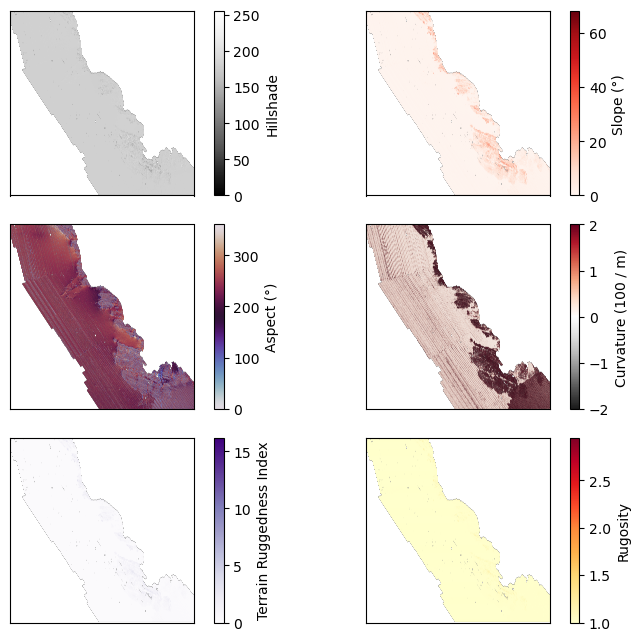

In [8]:
import xdem
import matplotlib.pyplot as plt

pigeon_point_file = '/Users/carolinedaley/Documents/MLML/MS263/Project/Data/DEM/Bathymetry_OffshorePigeonPoint.tif'
dem = xdem.DEM(pigeon_point_file)

attributes = xdem.terrain.get_terrain_attribute(
    dem.data,
    resolution=dem.res,
    attribute=["hillshade", "slope", "aspect", "curvature", "terrain_ruggedness_index", "rugosity"],
)

plt.figure(figsize=(8, 6.5))

plt_extent = [dem.bounds.left, dem.bounds.right, dem.bounds.bottom, dem.bounds.top]

cmaps = ["Greys_r", "Reds", "twilight", "RdGy_r", "Purples", "YlOrRd"]
labels = ["Hillshade", "Slope (°)", "Aspect (°)", "Curvature (100 / m)", "Terrain Ruggedness Index", "Rugosity"]
vlims = [(None, None) for i in range(6)]
vlims[3] = [-2, 2]

for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.imshow(attributes[i].squeeze(), cmap=cmaps[i], extent=plt_extent, vmin=vlims[i][0], vmax=vlims[i][1])
    cbar = plt.colorbar()
    cbar.set_label(labels[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

### Zonal Statistics within CCFRP Gridcells

Once I generated habitat metrics for each locations sampled by CCFRP, I calculated the mean of each metric in each CCFRP gridcell using zonal statistics in the [Zonal Statistics within CCFRP Gridcells.ipynb](http://localhost:8888/lab/tree/Project/Zonal%20Statistics%20within%20CCFRP%20Gridcells.ipynb) notebook. 

I overlaid derived habitat metrics with a shapefile of [CCFRP gridcells](http://localhost:8888/lab/tree/Project/Data/shapefiles/Grid%20Cells%20Shapefile%202021) to create a 2D dataframe that associates the mean of each habiat metric with the location (e.g. Ano Nuevo) and ID (e.g. MPA) of each gridcell. 

The [resultant .csv file](http://localhost:8888/lab/tree/Project/habitat_metrics_summary.csv) is housed locally in this repository and printed below: 

In [16]:
import pandas as pd

df = pd.read_csv('/Users/carolinedaley/Documents/MLML/MS263/Project/habitat_metrics_summary.csv')

# Remove rows where habitat metrics are Nan
habitat_metrics = ['aspect', 'curvature', 'rugosity', 'slope', 'index']
df_cleaned = df.dropna(subset=habitat_metrics, how='all')

# Remove columns that have no data 
df_cleaned = df_cleaned.dropna(axis=1, how='all')

df_cleaned

,ID,Site,aspect,curvature,rugosity,slope,index
100,REF,Point Conception,198.310460,0.000473,1.002540,2.543214,0.127306
101,MPA,Point Conception,191.860160,0.011771,1.002166,3.245501,0.142615
102,MPA,Point Conception,170.073168,0.009044,1.001392,2.724835,0.120513
103,MPA,Point Conception,182.385872,0.007920,1.001180,2.441027,0.108269
104,REF,Point Conception,192.110644,0.000405,1.000722,1.534782,0.073460
...,...,...,...,...,...,...,...
419,REF,Cape Mendocino,182.757239,0.002168,1.035670,10.292155,1.041077
420,REF,Cape Mendocino,181.971878,0.016504,1.042806,11.395760,1.160871
421,REF,Cape Mendocino,181.020959,0.011323,1.039909,11.477960,1.147830
422,REF,Cape Mendocino,176.341652,-0.003131,1.023055,8.533854,0.833589


## Analyze Habitat Metrics 

### Assessing Covariance of Habitat Metrics

To address Q1, I performed a principal components analysis (PCA) on derived habitat metrics to examine how they covary in the [Assessing Covaraince of Habitat Metrics.ipynb](http://localhost:8888/lab/tree/Project/Assessing%20Covariance%20of%20Habitat%20Metrics.ipynb) notebook.

**Q1 Do derived benthic habitat metrics covary in relation to one another?** 

The below code prints the final PCA figure produced from this notebook: 

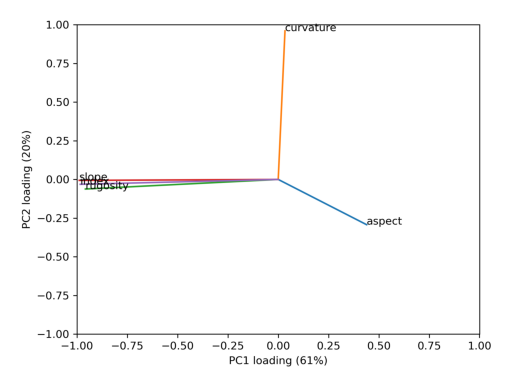

In [20]:
image_path = ('/Users/carolinedaley/Documents/MLML/MS263/Project/Figures/habitat_metrics_PCA.png')

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

This PCA reveals that slope, rugosity, and roughness index covary tightly both along both the first and second principal components. The close clustering of these variables suggests that these metrics describe similar characteristics of the habitat. The calculations for slope, rugosity, and roughness index all incoroporate change vertical change between pixels (xDEM contributors 2024), so covariance between these metrics is not surprising. 

Curvature and aspect, however, are isolated and distinct from each other and the above described cluster. While calculation for curvature also incoproates change in elevation, it primarily describes the convexity or concavity of the terrain, while aspect describes the orientation of the slope. Thus, curvature and asapect represent asepects of the benthic landscape that are distinct from one another and the slope-rugosity-roughness index cluser. 

### Analyzing Differences in Habitat Metrics 

To address Q2 and Q3, I analyzed differences in habitat metrics in the [Analyzing Differences in Habitat Metrics.ipynb](http://localhost:8888/lab/tree/Project/Analyzing%20Differences%20in%20Habitat%20Metrics.ipynb) notebook.

**Q2 Do benthic habitat metrics differ between CCFRP sampled MPAs and their associated reference sites within a location?** 

I performed Welch's t-tests between MPA and REF sites within the location for each habitat metric. Welch's t-tests assume that the data being analyzed are independnet and normal, but to not assume equal variance. Even though my data are not normal, I opted to use Welch's t-tests due to trade-offs of other non-parametric tests. 

Below is the result of the plotting function for Cape Mendocino: 

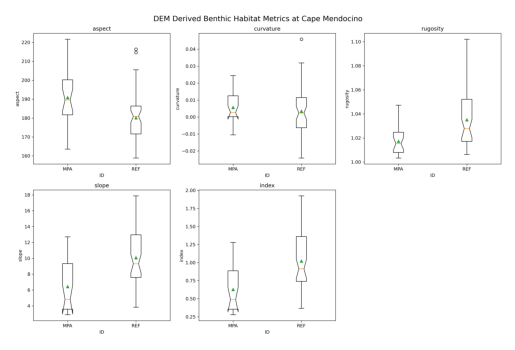

In [21]:
image_path = ('/Users/carolinedaley/Documents/MLML/MS263/Project/Figures/habitat_metrics_Cape Mendocino_plot.png')

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

And here is the code to call the Welch's t-test on each habitat metric between MPA and REF sites in the location of interest (here, Cape Mendocino). 

In [23]:
from scipy.stats import mannwhitneyu

def site_ttest(site_name): 
    # Subset the data for the current site
    site_data = df_cleaned[df_cleaned['Site'] == site_name]
    
    print(f"\nSite: {site_name}")
    
    # Loop through the habitat metrics
    for metric in habitat_metrics: 
        print(f"Metric: {metric}")
        
        # Get MPA and REF values, dropping NaNs
        mpa = site_data[site_data['ID'] == 'MPA'][metric].dropna()
        ref = site_data[site_data['ID'] == 'REF'][metric].dropna()
        
        # Perform the t-test
        stat, p = mannwhitneyu(mpa, ref, alternative='two-sided')           
        
        print(f"    t = {stat:.3f}, p = {p:.4f}")
site_ttest('Cape Mendocino')


Site: Cape Mendocino
Metric: aspect
    t = 907.000, p = 0.0016
Metric: curvature
    t = 703.000, p = 0.3804
Metric: rugosity
    t = 310.000, p = 0.0005
Metric: slope
    t = 300.000, p = 0.0003
Metric: index
    t = 286.000, p = 0.0002


Rugosity (p < 0.001), slope (p < 0.001), and roughness index (p < 0.001) are lower in gridcells in marine protected areas (MPA) than associated reference sites at Cape Mendocino. However, aspect is higher in gridcells within the MPA than the reference site (p = 0.002). There is no difference in curvature between gridcells in the MPA and reference site (p = 0.38). 

Therefore, benthic habiat metrics do differ between MPA and associated reference sites in CCFRP-sampled gridcells within a given location. However, the direction and strength of these differences varies by metric.  

**Q3 Do benthic habitat metrics differ between CCFRP sampled MPAs and their associated reference sites across locations?** 

I did an ANOVA test on a single habitat metric (here, rugosity) between MPA and reference sites across all locations.  

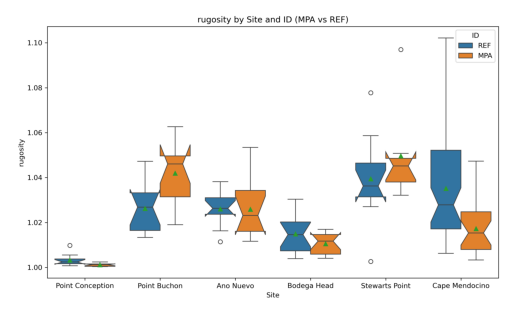

In [25]:
image_path = ('/Users/carolinedaley/Documents/MLML/MS263/Project/Figures/rugosity_by_location+site_plot.png')

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

## Conclusions

## Future Directions

## References

xDEM contributors. (2024). xDEM (v0.1.0). Zenodo. https://doi.org/10.5281/zenodo.11492983